# How to use bias and variance to identify overfitting and underfitting?

### Import library

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from mlxtend.evaluate import bias_variance_decomp
from sklearn.pipeline import make_pipeline

## Step1. generate fack data

#### Circle Parametric form
[Reference](https://en.wikipedia.org/wiki/Circle)

${\displaystyle x=a+r\,\cos t}$<br>
${\displaystyle y=b+r\,\sin t}$

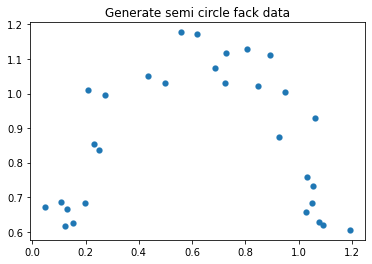

In [2]:
rad = 0.4  # radius
thk = 0.2  # thickness
n_data_points = 30
#  create semi circle fack data by random parameter
r = np.random.rand(n_data_points)*thk+rad
a = np.random.rand(n_data_points)*np.pi

# Circle Parametric form
x = rad + thk + r*np.cos(a)
y = rad + thk + r*np.sin(a)

plt.scatter(x, y, marker='.', linewidths=0.1, s=150)

plt.title('Generate semi circle fack data', fontsize=12)
# plt.savefig("semi_circle_fack_data.png", bbox_inches='tight')
plt.show()

In [3]:
data = pd.DataFrame([x, y]).T
data.columns=['x', 'y']

In [4]:
data.head()

,x,y
0,1.061042,0.929257
1,0.619436,1.170811
2,0.231719,0.854840
3,0.848947,1.020863
4,0.433454,1.051867


## Step2. split data

In [5]:
x = np.array(data['x'])
y = np.array(data['y'])
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=20210410)

In [6]:
X_train, y_train

(array([0.15375943, 1.09005067, 1.0288038 , 0.19816643, 1.07752274,
        1.05001778, 0.12375163, 1.05400663, 0.10916348, 0.80462438,
        0.1289383 , 1.06104227, 0.27243989, 0.94685235, 1.19167392,
        0.43345396, 0.23171854, 0.4979532 , 0.0493967 , 0.21033936]),
 array([0.62640755, 0.62089376, 0.65676691, 0.68240737, 0.62759019,
        0.68238546, 0.61799433, 0.73139258, 0.68548103, 1.12958792,
        0.66512126, 0.92925679, 0.99630085, 1.00331107, 0.60542226,
        1.05186662, 0.85483956, 1.03020564, 0.6713642 , 1.0107706 ]))

In [7]:
X_test, y_test

(array([0.55674654, 0.89403786, 0.6849695 , 0.72694586, 0.24909666,
        0.92683996, 0.72324517, 0.61943638, 0.84894719, 1.0318868 ]),
 array([1.17718392, 1.11235689, 1.07318802, 1.116465  , 0.83639019,
        0.87374684, 1.02912404, 1.17081133, 1.02086254, 0.75992279]))

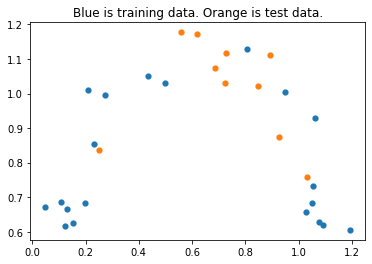

In [8]:
plt.scatter(X_train, y_train, marker='.', linewidths=0.1, s=150)
plt.scatter(X_test, y_test, marker='.', linewidths=0.1, s=150)
plt.title('Blue is training data. Orange is test data.', fontsize=12)
plt.show()

In [9]:
# define the model
lr_model = LinearRegression()

In [10]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

## Step3. training model

### Linear Regression

In [11]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
x_sample = np.linspace(min(data['x']), max(data['y']), 25)
y_lr_predict = lr_model.predict(x_sample[:, np.newaxis])

### Decision Tree Regressor

In [13]:
tree_model = DecisionTreeRegressor(random_state=20210410)

In [14]:
tree_model.fit(X_train, y_train)
y_tree_predict = tree_model.predict(x_sample[:, np.newaxis])

### Polynomial Basis Model

#### degree=2

In [15]:
poly_model_degree2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [16]:
poly_model_degree2.fit(X_train, y_train)
y_poly_degree2_predict = poly_model_degree2.predict(x_sample[:, np.newaxis])

#### degree=8

In [17]:
poly_model_degree27 = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

In [18]:
poly_model_degree27.fit(X_train, y_train)
y_poly_degree27_predict = poly_model_degree27.predict(x_sample[:, np.newaxis])

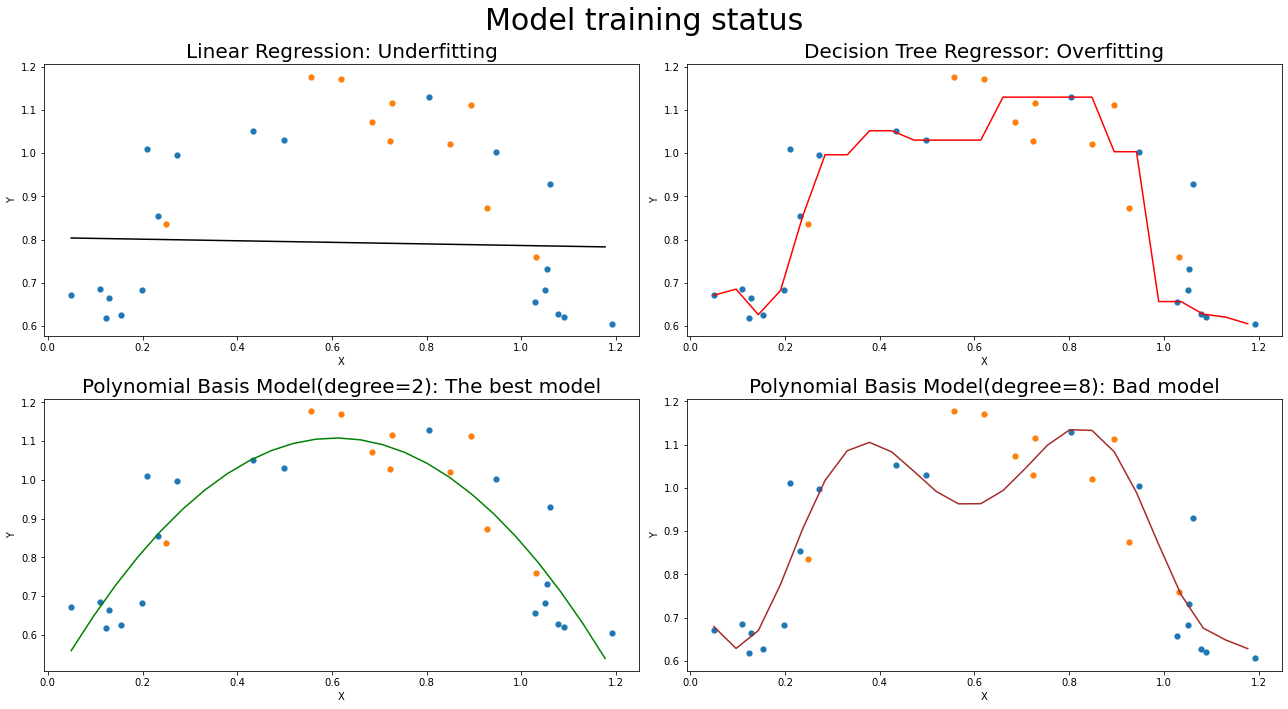

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle('Model training status', fontsize=30)

for row, col, title in zip([0,0,1,1], [0,1,0,1], ['Linear Regression: Underfitting',
                                                  'Decision Tree Regressor: Overfitting',
                                                  'Polynomial Basis Model(degree=2): The best model',
                                                  'Polynomial Basis Model(degree=8): Bad model']):
    
    axs[row, col].scatter(X_train, y_train, marker='.', linewidths=0.1, s=150)
    axs[row, col].scatter(X_test, y_test, marker='.', linewidths=0.1, s=150)
    axs[row, col].set_title(title, fontsize=20)

    
axs[0, 0].plot(x_sample, y_lr_predict, c='black')
axs[0, 1].plot(x_sample, y_tree_predict, c='red')
axs[1, 0].plot(x_sample, y_poly_degree2_predict, c='green')
axs[1, 1].plot(x_sample, y_poly_degree27_predict, c='brown')


for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')
    
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

plt.tight_layout()
# plt.show()

## Step4. find out bias and variance

[Reference](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/)

### Underfitting: low variance and high bias

In [20]:
# estimate bias and variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lr_model, X_train, y_train, X_test, y_test,
        loss='mse', 
        random_seed=20210410)

# summarize results
print('Average expected loss(MSE): %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss(MSE): 0.070
Average bias: 0.068
Average variance: 0.002


### Overfitting: low bias and heigh varience

In [21]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree_model, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=20210410)

# summarize results
print('Average expected loss(MSE): %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss(MSE): 0.015
Average bias: 0.007
Average variance: 0.009


### The best model

In [22]:
# estimate bias and variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        poly_model_degree2, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=20210410)

# summarize results
print('Average expected loss(MSE): %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss(MSE): 0.006
Average bias: 0.004
Average variance: 0.002


### Bad training model

In [23]:
# estimate bias and variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        poly_model_degree27, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=20210410)

# summarize results
print('Average expected loss(MSE): %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss(MSE): 140.643
Average bias: 1.412
Average variance: 139.231
